# Figure 9: Node classification comparison between cell, ecm and cell-ECM graphs


In [1]:
from glob import glob 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

In [7]:
cell_ecm_results = pd.read_csv("D:\Supplementary_figures\SuppTable2_CEG_HyperparameterResults.csv", header=2)
cell_ecm_results.sort_values(by='F1_Score', ascending=False)

,Dmax_CC,Dmax_CE,N_graph,K_knn,F1_Score
0,17,7,24,15,0.5253
1,40,7,17,17,0.5007
2,26,7,15,25,0.4998
3,35,12,13,21,0.4886
4,27,3,23,25,0.4741
...,...,...,...,...,...
97,4,0,26,6,0.0570
98,0,0,6,6,0.0570
99,4,0,28,6,0.0570
100,4,0,21,6,0.0570


In [24]:
# Load results with optimal Cell-ECM graph results 
macro_metrics = pd.read_csv("D:/Supplementary_figures/CC17_CE7__NG24_Kclsf15/macro_metrics.csv")
macro_metrics = macro_metrics.loc[[0, 2, 1]] # Reorder to cell, ECM, cell-ECM

ceg_ct_results = pd.read_csv('D:/Supplementary_figures/CC17_CE7__NG24_Kclsf15/ceg_celltypes.csv')
cg_ct_results = pd.read_csv('D:/Supplementary_figures/CC17_CE7__NG24_Kclsf15//cg_celltypes.csv')
ecm_ct_results = pd.read_csv('D:/Supplementary_figures/CC17_CE7__NG24_Kclsf15//ecm_celltypes.csv')


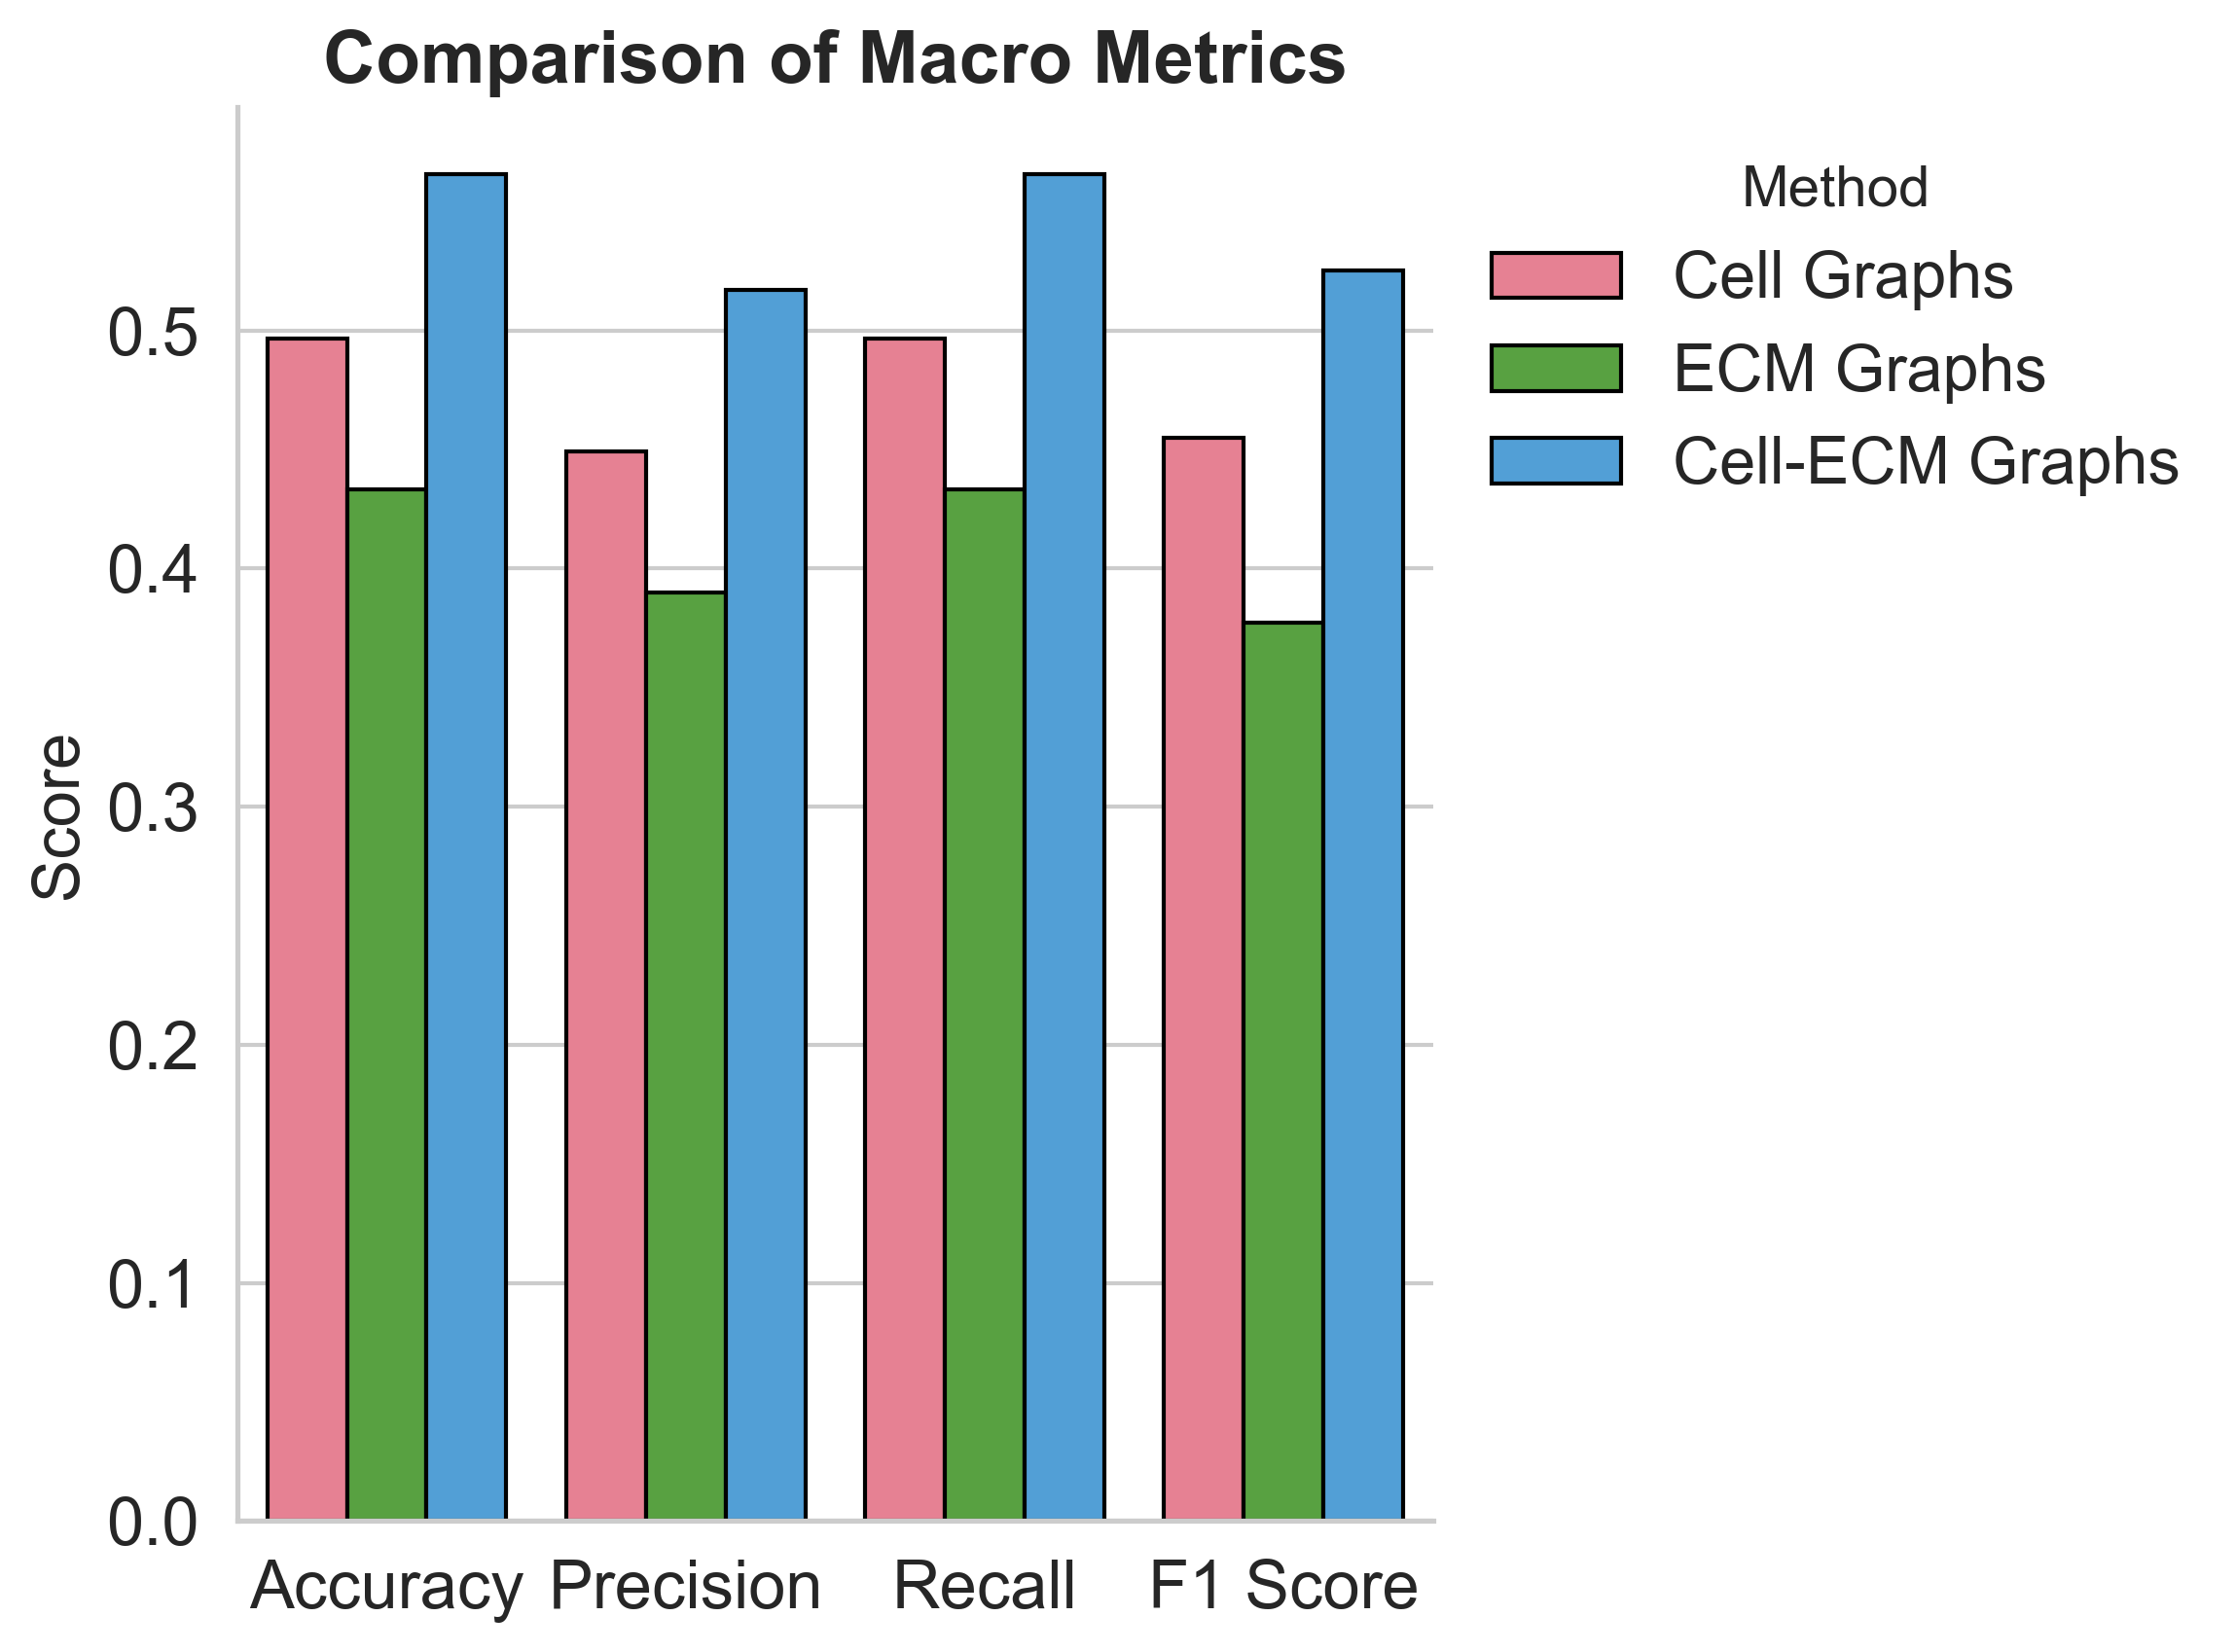

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure proper column names
macro_metrics.columns = ["Method", "Accuracy", "Precision", "Recall", "F1 Score"]

# Reshape for Seaborn
df = macro_metrics.melt(id_vars="Method", var_name="Metric", value_name="Score")

# Set theme for a clean scientific look
sns.set_theme(style="whitegrid", font_scale=1.5)

# Define an improved HLS color palette
palette = sns.color_palette("husl", desat=1, n_colors=df["Method"].nunique())  # 'dark' gives richer colors

# Create bar plot
plt.figure(figsize=(8, 6), dpi=300)
ax = sns.barplot(data=df, x="Metric", y="Score", hue="Method", palette=palette, edgecolor="black")

# Customize aesthetics
ax.set_ylabel("Score", fontsize=16)
ax.set_xlabel("")
ax.set_title("Comparison of Macro Metrics", fontsize=18, weight="bold")

# Move the legend outside the plot
ax.legend(title="Method", fontsize=16, title_fontsize=14, frameon=False, loc='upper left', bbox_to_anchor=(1, 1))

# Remove unnecessary spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.savefig("node_clsf_macro.tiff", format="tiff", dpi=600)
plt.show()


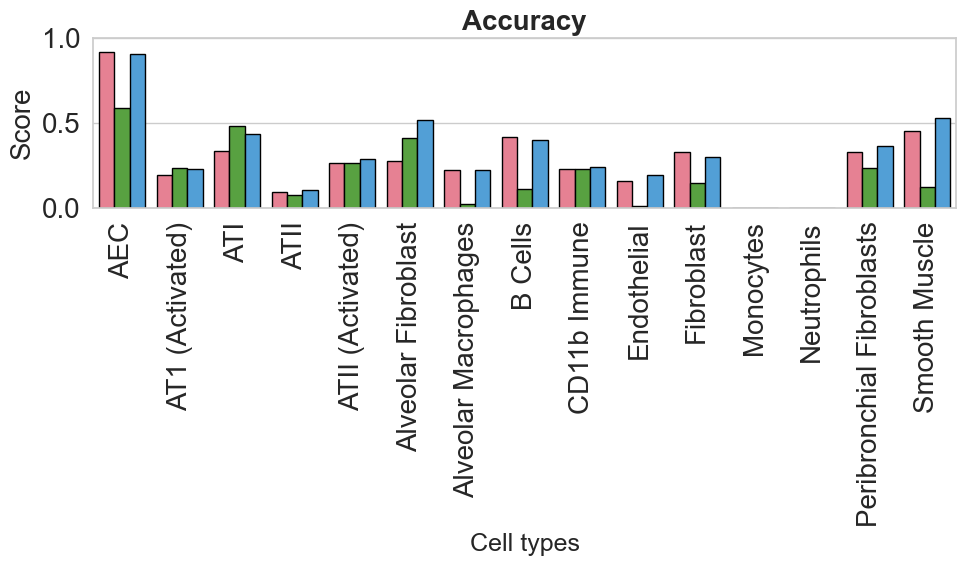

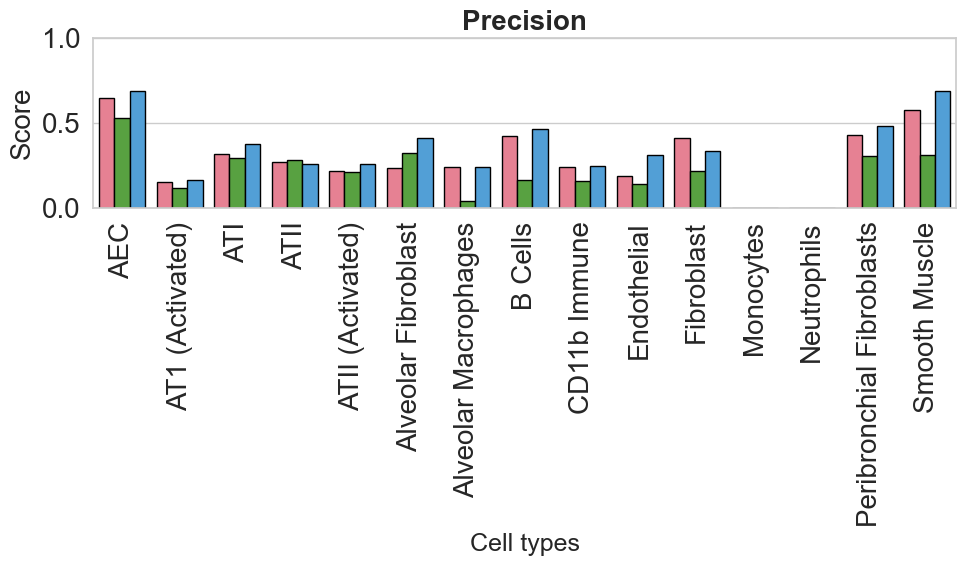

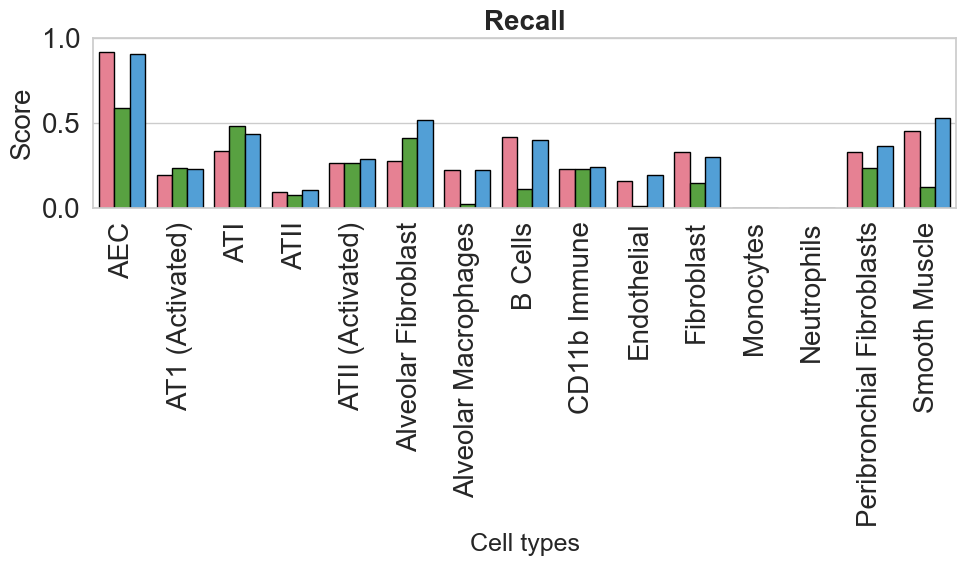

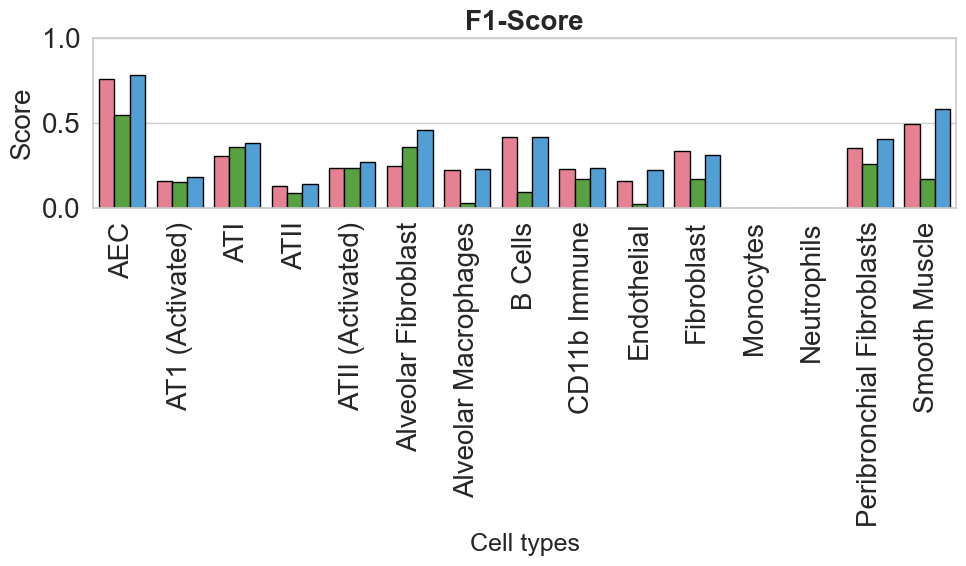

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary of dataframes for iteration
df_dict = {"Cell Graphs": cg_ct_results,"ECM Graphs": ecm_ct_results, "Cell-ECM Graphs": ceg_ct_results}

# Extract all cell types (excluding last three summary rows)
cell_types = ceg_ct_results.iloc[:-3, 0]

# Define metric names
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Iterate over each metric and create a separate plot
for metric in metrics:
    data = pd.DataFrame({
        "Cell Type": list(cell_types) * len(df_dict),
        "Method": sum([[method] * len(cell_types) for method in df_dict.keys()], []),
        metric: sum([df.iloc[:-3][metric].tolist() for df in df_dict.values()], [])
    })
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x="Cell Type", y=metric, hue="Method", palette="husl", edgecolor="black")
    
    plt.title(f"{metric}", fontsize=20, fontweight="bold")
    plt.ylim(0, 1)
    plt.xlabel("Cell types")
    plt.ylabel("Score", fontsize=20)
    
    # Increase tick font sizes
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)

    # Remove the legend
    plt.legend().remove()

    plt.tight_layout()
    plt.savefig(metric + '.tiff', dpi=300)
    plt.show()
